<a href="https://colab.research.google.com/github/javier-jaime/Stock_Price_Forecasting/blob/main/Update3_BTC_Price_Forecasting_with_yfinance_and_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin Price Forecasting with yfinance and Facebook Prophet**

## Importing all the necessary Libraries

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'

     |████████████████████████████████| 6.3 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


## Importing the Dataset & Exploring it

In [108]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
print(f'You entered {stock}, here is the data from the last 10 days:')
period = '3y'
ticker = yf.Ticker(stock)
data = ticker.history(period)
data.reset_index(inplace=True)
data.tail(10)

Enter the stock ticker: BTC-USD
You entered BTC-USD, here is the data from the last 10 days:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
718,2021-11-21,59730.507812,60004.425781,58618.929688,58730.476562,26123447605,0,0
719,2021-11-22,58706.847656,59266.359375,55679.839844,56289.289062,35036121783,0,0
720,2021-11-23,56304.554688,57875.515625,55632.761719,57569.074219,37485803899,0,0
721,2021-11-24,57565.851562,57803.066406,55964.222656,56280.425781,36635566789,0,0
722,2021-11-25,57165.417969,59367.968750,57146.683594,57274.679688,34284016248,0,0
723,2021-11-26,58960.285156,59183.480469,53569.765625,53569.765625,41810748221,0,0
724,2021-11-27,53736.429688,55329.257812,53668.355469,54815.078125,30560857714,0,0
725,2021-11-28,54813.023438,57393.843750,53576.734375,57248.457031,28116886357,0,0
726,2021-11-29,57291.906250,58872.878906,56792.527344,57806.566406,32370840356,0,0
727,2021-11-30,57679.746094,59008.835938,56115.191406,57116.609375,39312388096,0,0


In [109]:
print('These are the basic stats:')
data.describe()

These are the basic stats:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,728.000000,728.000000,728.000000,728.000000,7.280000e+02,728.0,728.0
mean,27474.765985,28238.480939,26653.170240,27536.440395,3.912061e+10,0.0,0.0
std,19680.087911,20232.002088,19046.993900,19691.776004,2.097697e+10,0.0,0.0
min,5002.578125,5331.833984,4106.980957,4970.788086,1.225260e+10,0.0,0.0
25%,9388.874023,9544.855957,9267.868164,9407.099365,2.586795e+10,0.0,0.0
50%,18631.774414,19048.535156,18153.489258,18670.999023,3.519197e+10,0.0,0.0
75%,46401.472656,47873.506836,44761.864258,46462.320312,4.685748e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


# Data Visualization (plotly express) - Visualizing the historical performance

In [110]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

In [111]:
px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [112]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [113]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

In [114]:
def get_hurst_exponent(time_series, max_lag=100):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

In [115]:
hurst = pd.DataFrame(columns =["hurst_exp","lag"])
lags = range(4, 160, 1)
for lag in lags:
    hurst_exp = get_hurst_exponent(data["Close"].values, lag)
    hurst = hurst.append({"hurst_exp":hurst_exp,"lag":lag},ignore_index=True)
px.line(hurst, x="hurst_exp", y="lag", title=f'{stock} Hurst Exp')

## Data Preparation for Facebook Prophet

In [116]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
723,2021-11-26,53569.765625
724,2021-11-27,54815.078125
725,2021-11-28,57248.457031
726,2021-11-29,57806.566406
727,2021-11-30,57116.609375


## Creating Facebook Prophet Model

In [117]:
m=Prophet(daily_seasonality=False)
m.fit(prophet_df)

##Forecasting

In [118]:
periods = 30
future=m.make_future_dataframe(periods)

In [119]:
forecast=m.predict(future)

In [120]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-30,16732.522030,4572.906242,11261.207029,16732.522030,16732.522030,-8936.096459,-8936.096459,-8936.096459,52.031122,52.031122,52.031122,-8988.127581,-8988.127581,-8988.127581,0.0,0.0,0.0,7796.425570
1,2019-12-01,16542.826812,4190.345792,10724.007270,16542.826812,16542.826812,-9020.195020,-9020.195020,-9020.195020,7.660951,7.660951,7.660951,-9027.855970,-9027.855970,-9027.855970,0.0,0.0,0.0,7522.631792
2,2019-12-02,16353.131594,4003.099758,10515.440760,16353.131594,16353.131594,-9053.593247,-9053.593247,-9053.593247,5.690882,5.690882,5.690882,-9059.284129,-9059.284129,-9059.284129,0.0,0.0,0.0,7299.538347
3,2019-12-03,16163.436375,3908.065029,10294.441482,16163.436375,16163.436375,-9190.017246,-9190.017246,-9190.017246,-108.320063,-108.320063,-108.320063,-9081.697183,-9081.697183,-9081.697183,0.0,0.0,0.0,6973.419130
4,2019-12-04,15973.741157,3589.926549,10320.579480,15973.741157,15973.741157,-9051.040411,-9051.040411,-9051.040411,43.068659,43.068659,43.068659,-9094.109070,-9094.109070,-9094.109070,0.0,0.0,0.0,6922.700746
5,2019-12-05,15784.045939,3295.043147,9942.904405,15784.045939,15784.045939,-9165.697496,-9165.697496,-9165.697496,-70.421538,-70.421538,-70.421538,-9095.275959,-9095.275959,-9095.275959,0.0,0.0,0.0,6618.348443
6,2019-12-06,15594.350721,3246.696012,9609.292700,15594.350721,15594.350721,-9013.430225,-9013.430225,-9013.430225,70.289986,70.289986,70.289986,-9083.720211,-9083.720211,-9083.720211,0.0,0.0,0.0,6580.920497
7,2019-12-07,15404.655503,3028.061014,9837.573477,15404.655503,15404.655503,-9005.733381,-9005.733381,-9005.733381,52.031122,52.031122,52.031122,-9057.764503,-9057.764503,-9057.764503,0.0,0.0,0.0,6398.922123
8,2019-12-08,15214.960285,2916.741470,9677.443015,15214.960285,15214.960285,-9007.914434,-9007.914434,-9007.914434,7.660951,7.660951,7.660951,-9015.575385,-9015.575385,-9015.575385,0.0,0.0,0.0,6207.045852
9,2019-12-09,15025.265067,2856.267945,9313.642520,15025.265067,15025.265067,-8949.524410,-8949.524410,-8949.524410,5.690882,5.690882,5.690882,-8955.215292,-8955.215292,-8955.215292,0.0,0.0,0.0,6075.740657


In [121]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

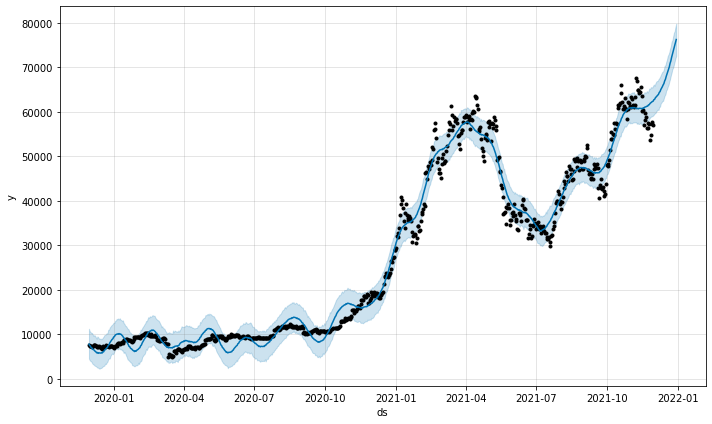

In [122]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

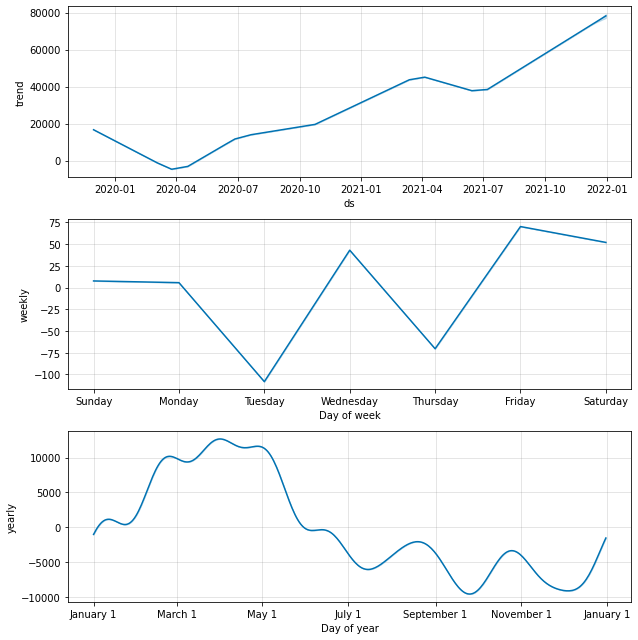

In [123]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [28]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>